# Load the Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
#Описание набора данных
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#Кол-во отсутствующих значений по столбцам
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analytics

### ***У женщин значительно более высокий уровень выживаемости по сравнению с мужчинами***

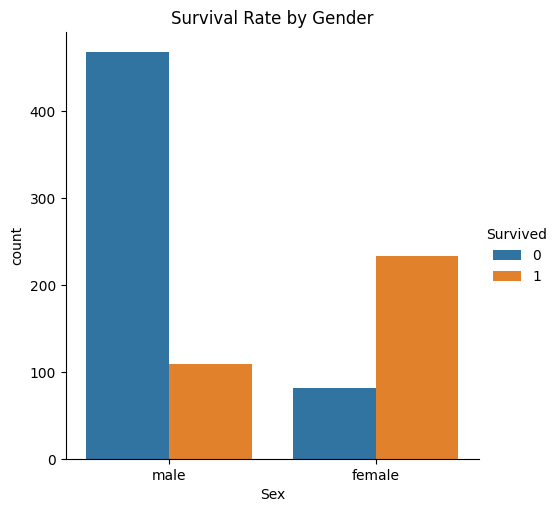

In [7]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Gender")
plt.show()

### ***Пассажиры классов 1 и 2 имели более высокие показатели выживаемости по сравнению с пассажирами более низких классов***

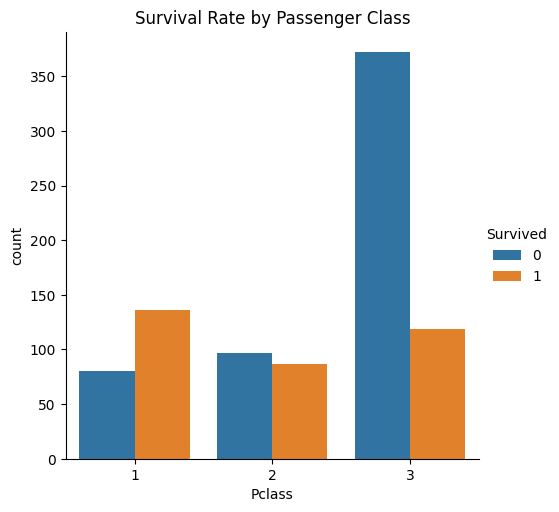

In [13]:
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

### ***Пассажиры, высадившиеся из Шербура, имели более высокий процент выживаемости по сравнению с пассажирами из других портов***

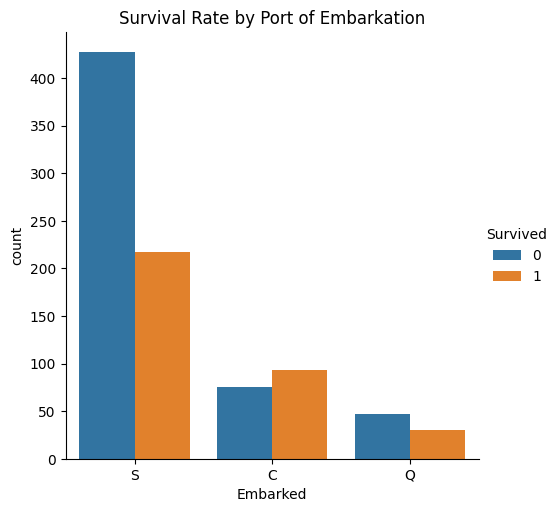

In [14]:
sns.catplot(x="Embarked", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.show()

### ***Дети и подростки имели более высокие показатели выживаемости***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


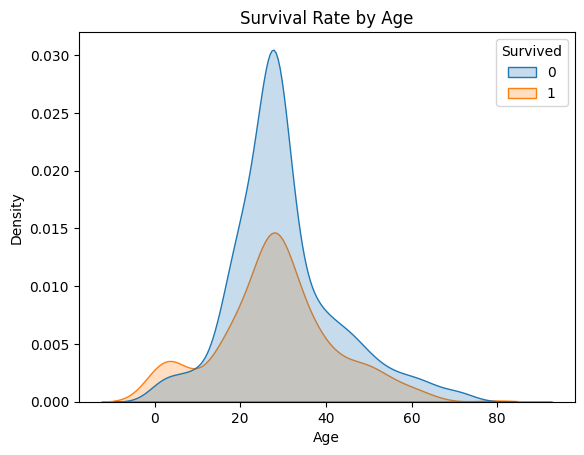

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())

sns.kdeplot(data=df, x="Age", hue="Survived", fill=True)
plt.title("Survival Rate by Age")
plt.show()

### ***Пассажиры с меньшим числом членов семьи имели более высокие показатели выживаемости***

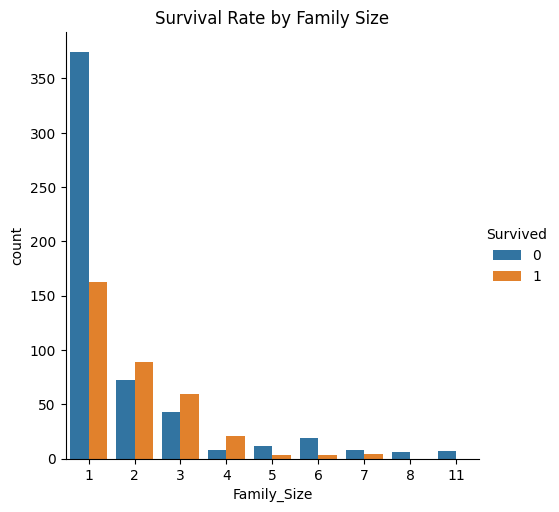

In [16]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

sns.catplot(x="Family_Size", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Family Size")
plt.show()

### ***Пассажиры, оплатившие более высокие тарифы, имели более высокие показатели выживаемости***

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

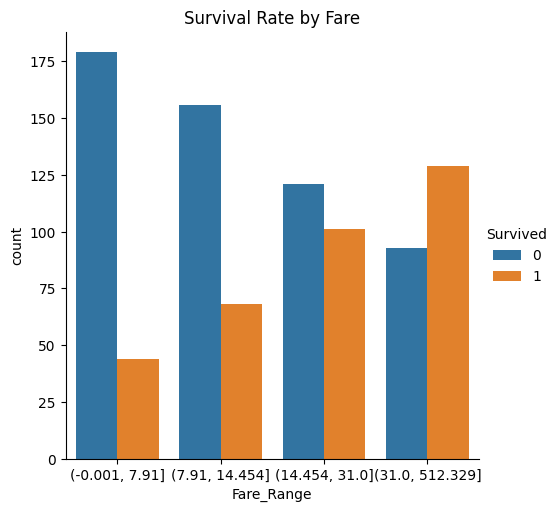

In [17]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

sns.catplot(x="Fare_Range", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Fare")
plt.show()

# Feature Engineering

In [35]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

In [36]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)

In [37]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [38]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_emb = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_emb.fit_transform(df['Embarked'])

In [39]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Is_Alone
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1


# Model Build & Train

In [40]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization(momentum=0.97))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization(momentum=0.97))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization(momentum=0.97))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6007 - loss: 0.7888 - val_accuracy: 0.6224 - val_loss: 0.6703
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.6309 - val_accuracy: 0.6923 - val_loss: 0.6267
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7390 - loss: 0.5348 - val_accuracy: 0.7972 - val_loss: 0.5787
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7354 - loss: 0.5756 - val_accuracy: 0.8252 - val_loss: 0.5286
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7802 - loss: 0.4886 - val_accuracy: 0.8182 - val_loss: 0.4815
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7654 - loss: 0.5210 - val_accuracy: 0.8252 - val_loss: 0.4431
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7963 - loss: 0.4547 - val_accuracy: 0.8252 - val_loss: 0.4227
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.4363 - val_accuracy: 0.8462 - val_loss

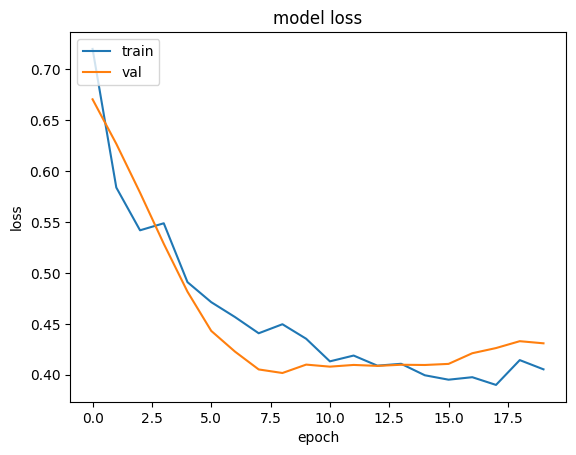

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [79]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [80]:
model_loaded.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.24091499],
       [0.0635685 ],
       [0.09190553],
       [0.8682007 ],
       [0.5180428 ],
       [0.9882519 ],
       [0.7033704 ],
       [0.17061989],
       [0.5849659 ],
       [0.9880612 ],
       [0.35995513],
       [0.15528096],
       [0.23073803],
       [0.09111173],
       [0.06385803],
       [0.98323053],
       [0.27735615],
       [0.7034548 ],
       [0.07680687],
       [0.27320844],
       [0.10510343],
       [0.3368888 ],
       [0.4568769 ],
       [0.09206586],
       [0.16590178],
       [0.04828005],
       [0.18157105],
       [0.06659677],
       [0.13933404],
       [0.4734824 ],
       [0.10137042],
       [0.5063479 ],
       [0.30324948],
       [0.4729842 ],
       [0.10984699],
       [0.15381433],
       [0.47704175],
       [0.7033704 ],
       [0.9643985 ],
       [0.15006931],
       [0.15484464],
       [0.08353504],
       [0.15042897],
       [0.13463223],
       [0.44132102],
       [0.12489284],
       [0.1015017 ],
       [0.094

Пример хорошего графика

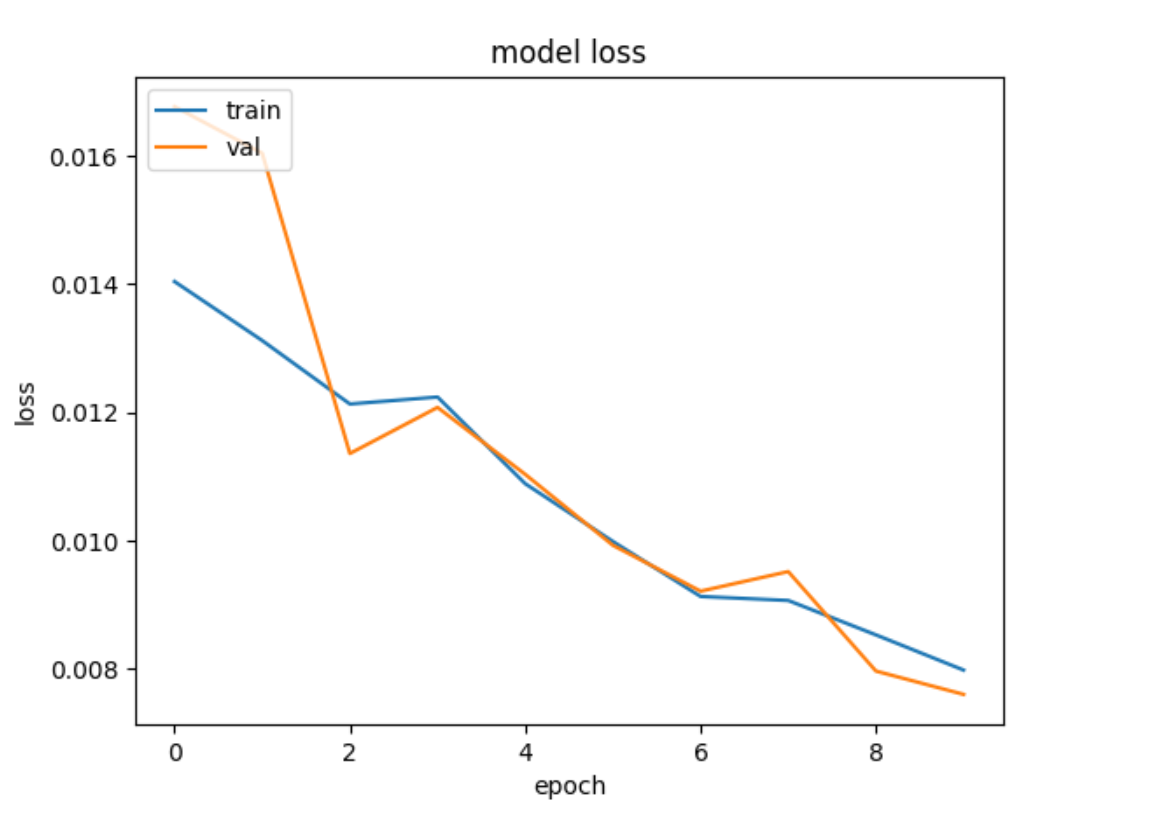